# CardGameAssistant-ImageProcessing
This program reads in a hand of 5 cards and determines the value of each card.
By Kyle Heffernan, Eoin Gallagher and Ryan Byrne
For Computer Science Infrastructure 4th year module Image Processing in TU Dublin.

# Idea
When learning poker many people have trouble understanding the poker hands and their ranks[26]. Our program aims at making this process easier for new players where they just take an image of their takes and the program will tell them what poker hand they have.


# Requirements
    Tesseract OCR
    pytesseract

### These steps will give you a rundown of how to install the above packages

#### if you are using anaconda then these are the steps for installation

* first open anaconda
* once anaconda is running look for program titled `CMD.exe Prompt` it has a picture of the anaconda logo above
* once located click this program and enter the following commands
  * `conda install -c conda-forge pytesseract`
  * `conda install -c conda-forge/label/cf202003 pytesseract`
  * TesseractOCR needs to be downloaded from: [https://github.com/UB-Mannheim/tesseract/wiki] the steps for installation are below:
    * When selecting components to install you do not need to click anything extra you can leave them checked with the default ones, then click next.
    * The next step is to choose to install Location you should leave this as is.
   * This should have successfully installed the necessary libraries in order to run our project

#### If you are using python without anaconda you should be able to install with this

* Prerequisites before you install pytesseract:
  * `pip install pillow`
  * `pip install matplotlib`
  * `pip install opencv-python`
  * `pip install easygui`
  * TesseractOCR needs to be downloaded from: [https://github.com/UB-Mannheim/tesseract/wiki] the steps for installation are below:
    * When selecting components to install you do not need to click anything extra you can leave them checked with the default ones, then click next.
    * The next step is to choose to install Location you can leave this as is copy this location as it will be used later, then click next until the install is finished.
    * Once finished you then need to add tesseract to your enviroment variables this is done through the following steps:
      * go to your windows search bar and type in `edit the system environment variables` and hit enter.
      * then click the `environment variables` option.
      * then click on `PATH`.
      * then click on `Edit...`.
      * then when your in the edit environment variable screen click `New`.
      * In the highlighted area that appeared paste the path you copied earlier from the TessarctOCR install if you havent copied it the default location is `C:\Program Files\Tesseract-OCR\tesseract`.
      * to verify the install open CMD and type `tesseract`.
  * once the above steps have been taken you can proceed to install pytesseract using the following command:
    * `pip install pytesseract`

# Instructions
* With tesseract set up, run all cells in the notebook. 
* There will be a file open box allowing you to pick any of the sample card hands. 
* Select one of the files in the base project folder.
* The program will display the value of all the cards in the chosen image and output what poker hand the user has.

# Assumptions
* This program assumes the user will use an input image of five playing cards taken from above the cards.
* The background will be darker than the cards themselves.
* The image will be of high enough quality to decypher symbols.
* The image will be clear and not blurry.
* There are no other large object in the image other than the cards.

# Basic structure
* The program will take in the file then isolate each cards and warp it to match a vertical rectangle box
* It will then crop the sections it needs for detecting letter and symbol
* It will get the card type using the letter section
* It will get the card symbol using the symbol section
* It will use all the types and symbols to check what hand the user has


# Algorithm steps:
* This Program starts off by allowing to choose a picture card of their hand of 5 cards that they want analysis on
* It then calls the function `readCards()` takes in the user inputted image and performs all necessary operatioins on the image.
* The image is converted to greyscale and then to binary format.
* All the comparison suit images are loaded in from the files.
* With this binary mask the contours found and sorted by size the program then proceeds to call the function `warpPerspective()` for each card [1] [2] 
* The warpPerspective function takes in the largest contour found
* it then sets two variables called to width and height which will be used for seting to size of the result of warpPerspective
* the program then enters a for loop that loops through the point on the biggest contour and gets the points of the vertices and inputs them into an array[9] [10] [11] [13] [14] [15]
* the points in the array are then sorted and inputted into a new array called `cardPtsSorted()`
* using the sorted point and the function `cv2.getPerspectiveTransform()` we get the matrix for the `cv2.warpPerpective()` function[16]
* the output image is then obtained  from `cv2.warpPerpective()` and uses the orignal image, the matrix from the step above and the width and height that was set at the beginning of the function [16]
* The images are then cropped from this output image of the card to get the to get the letter and symbol areas.[6] [5]
* The `GetSymbol` function is called which performs operations on the cropped symbol images to get the contour.
* The contour is then centered on so that the comparison is accurate every time.
* The `suitComparison()` function is then called which finds the difference in the card symbol against all the predefined suit images and returns the most likely suit. 
* The most likely suit is then returned back to `readCards()` which then gets the letter from the cropped letter image with the `GetLetter()` method.
* This method just cleans up the image and uses pytesseract on it to get the string of the letter in the image.
* This string is then checked and returns the specific card type back to `readCards()`
* The program then displays the images its using and what card it is back to the user.
* All letters and symbols are added to arrays which are passed to the `GetLetter()` function.
* This functions checks if the cards are sequential and then performs a series of checks to get what poker hand type it is based on the rules of a hand.
* This result is then returned to the user and the program is complete.

# Performance
* The algorithm takes a very small amount of time to run.
* The program is mostly accurate is perfect for all the different poker hand images in the project folder, but accuracy depends on the image, so if the user wants to test an image from far away, with very bad lighting, or a bad background the accuracy may faulter. 
* The algorithm should work for a range of card brands if they are spaced out properly but this may vary greatly.
* An effort to increase performance has been made such as only having neccessary things within loops and breaking out of statements if the condition is met.

# Underlying concepts & Research:
* Thresholding: This selects certain parts of a grayscale image based on a threshold value allowing the user to separate objects. [37]
* Masking: This selects certain parts of an image based on a binary mask.[36]
* Contours: This finds continuous points on a shape and can be used for object detection.[35]
* fillPoly: This fills in an area specified by the parameters.[34]
* GaussianBlur: This blurs the pixels to make the images better for detection and thresholding[33]
* absDiff: Compares the differences between two images [21]  [22]  [23]  [25]
* Bitwise operations: This is used for editing and flipping the masks of images.[30]
* WarpPerspective: Used to get birds eye view of a photo.
* pytesseract OCR: There are multiple methods of Optical Character Recognition in python.[27] OCR is basically for extracting text from an image. There were many libaries to choose from[28] but ultimately we ended up choosing pytesseract[29] as it is recommended for use with python. This was hard to get working at first but we found some resources that helped.[32]
* Bounding rect: Puts rectangle around contour area.
* Resizing: Changing the dimensions of an image.
* Colour detection: We ultimately found a better to find colour but we researched colour detection for a while [31]

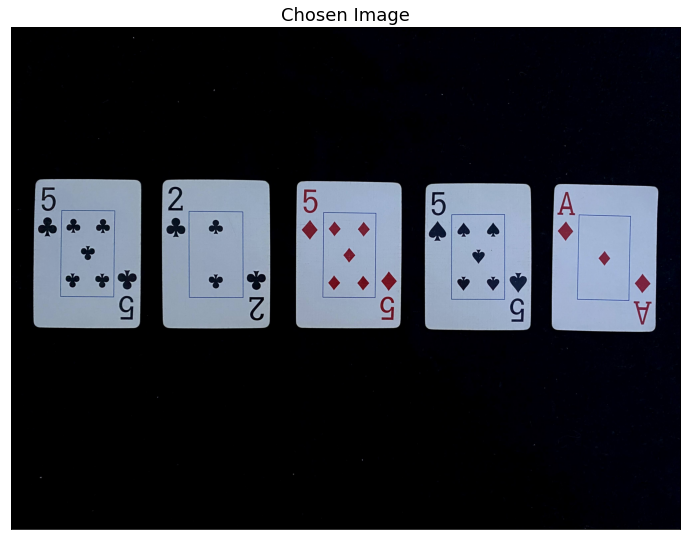


The card is a: Black 2 of Clubs


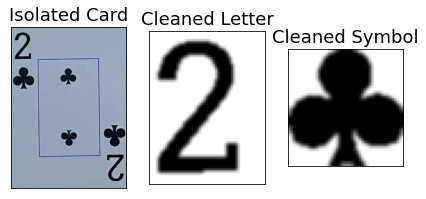


The card is a: Black 5 of Clubs


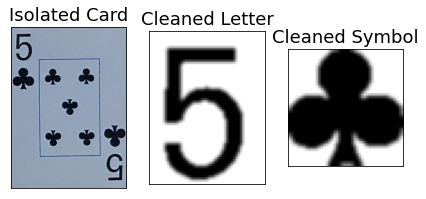


The card is a: Black 5 of Spades


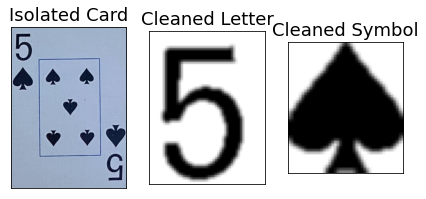


The card is a: Red 5 of Diamonds


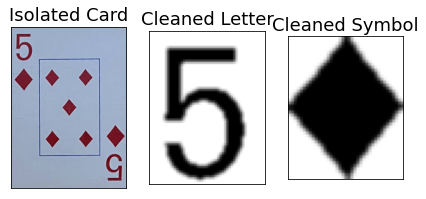


The card is a: Red Ace of Diamonds


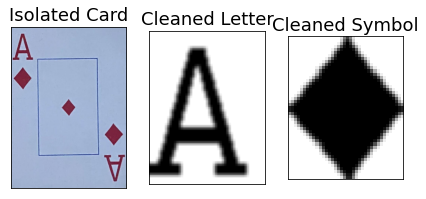



The hand you have is: 3 of a kind




-1

In [4]:
#Poker card game assistant that returns the type of hand the player has from an input image
#By Kyle Heffernan, Eoin Gallagher and Ryan Byrne 26/11/20

#Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui
import pytesseract

#Set plot parameters
plt.rcParams['figure.figsize'] = [12,16]#set the plot size
plt.rc('font', size=15)

#Perform all operations and methods on input image and print hand at the end
def readCards(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Show full input image at start
    plt.imshow(img, cmap='gray'), plt.xticks([]),plt.yticks([])
    plt.title('Chosen Image')
    plt.show()
    
    #Find cards by making a mask with thresholding and getting the largest contours of that
    T, B = cv2.threshold(G, thresh = 120, maxval = 255, type = cv2.THRESH_BINARY)
    C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    C = sorted(C, key=cv2.contourArea, reverse=True)
    
    # Reading in suit templates, done here so its only ran once and helps performance
    club = cv2.imread("SymbolComparisons\club.jpg")
    diamond = cv2.imread("SymbolComparisons\diamond.jpg")
    heart = cv2.imread("SymbolComparisons\heart.jpg")
    spade = cv2.imread("SymbolComparisons\spade.jpg")
    
    #Make arrays of letters and symbols to be passed to the GetHandType method
    cardLetters = [""]*5
    cardSymbols = [""]*5
    
    #Performs operations on the 5 biggest contours
    i = 0
    while i < 5:
        fig = plt.figure()#make a figure to show things on

        largestContour = C[i]
        warpedImg = warpPerspective(largestContour)

        #Crop image to just the card
        H,W,Channels = warpedImg.shape

        #Get the area around the Letter and symbol to pass them to their detection functions
        cropped_letter = warpedImg[int(H * 0.026):int(H * 0.22), int(W * 0.017):int(W * 0.22)]
        symbolArea = warpedImg[int(H * 0.18):int(H * 0.4), int(W * 0.015):int(W * 0.21)]
        #cv2.imshow("cropped_symbol", symbolArea)
        #key = cv2.waitKey(0)

        #Use cropped areas to call a function that return the text of what the symbol and letter are respectively
        cardSymbol = GetSymbol(symbolArea,fig,club,diamond,heart,spade)#Also pass fig to display
        cardLetter = GetLetter(cropped_letter,fig)
        
        if(cardSymbol == "Club" or cardSymbol == "Spade"):
            cardCol = "Black"
        else:
            cardCol = "Red"
        
        #Fill arrays for getHandType with each value of the card
        cardLetters[i] = cardLetter
        cardSymbols[i] = cardSymbol

        i = i + 1#increment through cards
        
        #Tell the user the info about each card
        print("\nThe card is a: "+cardCol+" "+cardLetter+" of "+cardSymbol+"s")
        #Display to notebook
        warpedImg = cv2.cvtColor(warpedImg, cv2.COLOR_BGR2RGB)#Change for displaying
        p1 = fig.add_subplot(2, 5, 1), plt.xticks([]),plt.yticks([])
        plt.title('Isolated Card')
        imgplot = plt.imshow(warpedImg, cmap='gray')
        plt.show()#Show 3 plots that have been made
        
    #Call method that uses all the card info to find what hand the user has and print it    
    GetHandType(cardLetters,cardSymbols)
        
#Use input image of the Letter in the top left to return the card type usign tesseract OCR. Also takes fig for plotting in notebook and it returns the cardType it finds
def GetLetter(croppedLetter,fig):
    #Convert, threshold and clean input image to be used by OCR
    gCroppedLetter = cv2.cvtColor(croppedLetter, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gCroppedLetter, 130, 255, cv2.THRESH_BINARY_INV)[1]
    imBlur = cv2.GaussianBlur(thresh, (3,3), 0)
    imBlur = 255 - imBlur#Invert

    #convert to text from the image with the letter using pytesseract
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    #Clean any extra characters or spaces it picked up so that its onyl one letter
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        
        
    cardType = ""
    #Special cards have a name so return that, or some characters are too similiar depending on font so it recognises most likely characters
    if(singleChar == "K" or singleChar == "k"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J" or singleChar == "j"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    elif(singleChar == "1" or singleChar == "0" or singleChar == "i" or singleChar == "l"):
        cardType = "10"
    elif(singleChar == "%"):
        cardType = "3"
    elif(singleChar == "h"):
        cardType = "5"
    else:#is number
        cardType = singleChar
           
    #Error checking for bad quality input
    if not(allPlayingCardTypes.__contains__(cardType)):
        print("Error detecting card, image may be of low quality")
        
    #Add to plot for displaying
    p1 = fig.add_subplot(2, 5, 2), plt.xticks([]),plt.yticks([])
    plt.title('Cleaned Letter')
    imgplot = plt.imshow(imBlur, cmap='gray')
    
    return cardType

def GetSymbol(symbolArea,fig,club,diamond,heart,spade):
    G = cv2.cvtColor(symbolArea, cv2.COLOR_BGR2GRAY)
    T, B = cv2.threshold(G, thresh = 120, maxval = 255, type = cv2.THRESH_BINARY)
    inverse = cv2.bitwise_not(B)
    sContour,_ = cv2.findContours(inverse, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    sC = sorted(sContour, key=cv2.contourArea, reverse=True)
    x,y,w,h = cv2.boundingRect(sC[0])
    cropped_symbol = symbolArea[y:y+h,x:x+w]

    G = cv2.cvtColor(cropped_symbol, cv2.COLOR_BGR2GRAY)
    T, B = cv2.threshold(G, thresh = 120, maxval = 255, type = cv2.THRESH_BINARY)
    inverse = cv2.bitwise_not(B)
    sContour,_ = cv2.findContours(inverse, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    sC = sorted(sContour, key=cv2.contourArea, reverse=True)

    cropped = cropped_symbol
    croppedH, croppedW, croppedChannels = cropped.shape 
    cropped_symbol = np.zeros([croppedH,croppedW,3],dtype=np.uint8)
    cropped_symbol.fill(255)
    cv2.fillPoly(cropped_symbol, pts =[(sC[0])], color=(0,0,0))
    cropped_symbol =  cv2.GaussianBlur(cropped_symbol, (3,3), 0)
    
    #Function for making symbol comarison image during development
        #if i == 3:
        #    cv2.imwrite("spade.jpg", cropped_symbol)
    
    #just display it to notebook
    p1 = fig.add_subplot(2, 5, 3), plt.xticks([]),plt.yticks([])
    plt.title('Cleaned Symbol')
    imgplot = plt.imshow(cropped_symbol, cmap='gray')
    
    #Since the suits are either red or black this is a simple way of detecting colour
    bestMatchSymbol = suitComparison(club, diamond, heart, spade, cropped_symbol,fig)
        
    return bestMatchSymbol

#This method takes a contour image and stretches it to the bounds of a rectangle to remove rotation and give birds eye view
def warpPerspective(contour):
    largestContour = contour #assigns th contour that has been passed in
    width, height = 250, 350 # sets static width and height to be used for the newly cropped photo
    newCardSize = np.float32([[0,0],[width,0], [width,height],[0, height]])#stores the points for the size of the new photo
    oldCardPts = np.float32([[0,0],[0,0],[0,0],[0,0]]) # used to store the corner points
    for cnt in largestContour : # loops
        
        coOrdinates = cv2.approxPolyDP(largestContour, 0.009 * cv2.arcLength(largestContour, True), True) #getting to co-ordinates of the vertices 
        
        arrayElement = 0
        
        coOrdinates = coOrdinates.ravel() # flattened array that contains the co-ordinates of the corners 
        a = 0
  
        for j in coOrdinates: 
            if(a % 2 == 0): #if a mod 2 is equal to 0 the below parts are triggered
                pointInput = 0 # used for setting point 0 and 1 inside the array element 
                x = coOrdinates[a] # assigns the x of the coordinate
                y = coOrdinates[a + 1] #assigns the y of the coordinate
                oldCardPts[arrayElement][pointInput] = x # inserts x into the array 
                oldCardPts[arrayElement][pointInput + 1] = y # inserts y into the array
                arrayElement = arrayElement + 1  
            a = a + 1
            
    cardPtsSorted = np.zeros((4, 2), dtype="float32") #creates an array filled with zeros that will be overwritten with the sorted points
    add = np.sum(oldCardPts, axis=1) 
    diff = np.diff(oldCardPts, axis=1)
    
    cardPtsSorted[0] = oldCardPts[np.argmin(add)] #sets top left points
    cardPtsSorted[2] = oldCardPts[np.argmax(add)] #sets bottom right points

    cardPtsSorted[1] = oldCardPts[np.argmin(diff)] #sets top right points
    cardPtsSorted[3] = oldCardPts[np.argmax(diff)] #sets bottom left point
    
    matrix = cv2.getPerspectiveTransform(cardPtsSorted,newCardSize) #getPer
    imgoutput = cv2.warpPerspective(inputImg,matrix,(width,height)) #output of cropped top down view of card
    #getLettersandSymbols(imgoutput)
    return imgoutput    


#Use the cropped image of the symbol to return the suit. Gets the suit with least amount of difference to the cropped image.
def suitComparison(club, diamond, heart, spade, inputTestImage,fig):
    # Variables for comparison
    smallestDiff = 1000000000
    match = "none"
    
    # Performs comparison with heart.
    height, width, _ = heart.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    difference = cv2.absdiff(testImage, heart)
    # If difference from heart is smaller, set that to best match
    currentDiff = int(np.sum(difference)/255)               
    if currentDiff < smallestDiff:
        smallestDiff = currentDiff
        match = "Heart"


    # Performs comparison with spade.
    height, width, _ = spade.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    difference = cv2.absdiff(testImage, spade)
    # If difference from spade is smaller, set that to best match
    currentDiff = int(np.sum(difference)/255)           
    if currentDiff < smallestDiff:
        smallestDiff = currentDiff
        match = "Spade"


    # Performs comparison with club.
    height, width, _ = club.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    difference = cv2.absdiff(testImage, club)
    # If difference from club is smaller, set that to best match
    currentDiff = int(np.sum(difference)/255)             
    if currentDiff < smallestDiff:
        smallestDiff = currentDiff
        match = "Club"


    # Performs comparison with diamond.
    height, width, _ = diamond.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    difference = cv2.absdiff(testImage, diamond)
    # If difference from diamond is smaller, set that to best match
    currentDiff = int(np.sum(difference)/255)      
    if currentDiff < smallestDiff:
        smallestDiff = currentDiff
        match = "Diamond"

    # Returns the match with the lowest difference to the cropped image.
    return match

#Taking in arrays of card types and symbols and checking what type of poker hand it is
def GetHandType(cardType,cardSymbols):
    isSequential = True#for checking if all the cards come up in a sequence of 5
    #print("Calculating Hand using with: ",cardType,cardSymbols)
    
    #Need to make an array of what position that card is based on the value of cards
    allCardIndexes = []#For holding the positions of the the cards in order of value in a deck
    i = 0
    while i < len(cardType):#for each card, add to array
        if(allPlayingCardTypes.__contains__(cardType[i])):#Error checking to make sure it doesnt add non cards
            allCardIndexes.append(allPlayingCardTypes.index(cardType[i]))
        else:
            print("ERROR: Low quality crad, cant add to numbers list")
            isSequential = False#Cant be sequential if it has incorrect input
        i+=1
    allCardIndexes.sort()#This sorts all the position values of the card list 
    
    #Use the prev array of positions to check if the hand does actually have cards in a sequence
    j = 0
    while j < len(allCardIndexes)-1:
        if not(allCardIndexes[j+1] == allCardIndexes[j]+1):#If the next allPlayingCardTypes position index value is not one higher than the last
            isSequential = False#The numbers arent sequential
            break
        j+=1
            
            
    handResult = ""
    #Get the actual hand type the user has based on their cards
    #This is done in the order of highest scoring cards so it will return the best hand first, etc returns two pairs not one pair
    if(cardSymbols.count(cardSymbols[0])>=5 and isSequential):#If all the same symbols and it has its sequential it could be royal flush or straigth flush
        if(cardType.__contains__("Ace") and cardType.__contains__("King") and cardType.__contains__("Queen") and cardType.__contains__("Jack") and cardType.__contains__("10")):
            handResult = "Royal Flush"#is a straight flush but with 10,J,Q,K,A. Best hand in poker
        else:
            handResult = "Straight Flush"
    #Check if the card has 4 in the hand of the same type
    elif(cardType.count(cardType[0])>=4 or cardType.count(cardType[1])>=4):#Check 2 numbers because one of the cards can be random btu 2 cant
        handResult = "4 of a kind"
    #Check if the card has 3 in the hand of the same type, if so it could be full house or 3 of a kind
    elif(cardType.count(cardType[0])>=3 or cardType.count(cardType[1])>=3 or cardType.count(cardType[2])>=3):
        #A set of 3, either the other set has 2 or not meaning its fullhouse or three of a kind
        if(cardType.count(cardType[0])==2 or cardType.count(cardType[1])==2 or cardType.count(cardType[2])==2 or cardType.count(cardType[3])==2):
            handResult = "FullHouse"
        else:#This is okay to set ahead of flush or straight even though its worth less because they cant be achieved if this 3 cards are the same
            handResult = "3 of a kind"
    #If the hand has 5 cards of same symbol but not in sequence
    elif(cardSymbols.count(cardSymbols[0])>=5):
        handResult = "Flush"
    #Hand is all sequential but not a flush
    elif(isSequential):
        handResult = "Straight"
    #Check if their is atleast one pair
    elif(cardType.count(cardType[0])>=2 or cardType.count(cardType[1])>=2 or cardType.count(cardType[2])>=2 or cardType.count(cardType[3])>=2 or cardType.count(cardType[4])>=2):
        #Find the amount of cards with matches because if theirs 4 matching cards but it wasnt 4 of a kind then theirs 2 pairs
        cardsWithMatch = 0
        i = 0
        while i < len(cardType):
            if cardType.count(cardType[i])>=2:
                cardsWithMatch += 1
            i+=1
        if(cardsWithMatch == 4):#If not 3 of a kind but 4 cards still match then there must be 2 pairs
            handResult = "Two pairs"
        else:#If more than 2 matching cards but not 4 then just one pair
            handResult = "One pair"
    else:#No special hands means no pairs / nothing
        handResult = "No pairs / Nothing"
        
    print("\n\nThe hand you have is: "+handResult+"\n\n")
    #END PROGRAM###
     
#Set pytesseract from path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
#Make an array of all cards to sequences can be detected
allPlayingCardTypes = ['2','3','4','5','6','7','8','9','10','Jack','Queen','King','Ace']
    
#Error checking correct input file
try:
    f = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])#open user file select
    inputImg = cv2.imread(f)#set a file to work with
    readCards(inputImg)#Call function to check all cards and what hand it is
except:
    print("Incorrect input file or input of too bad quality")
cv2.waitKey(0)#Wait so program doesnt close immediately in terminal



Bibliography:
* [1]“OpenCV Python (Resize, Crop, Rotation, and some other image Attributes),” CodeSpeedy, Nov. 02, 2019. https://www.codespeedy.com/basics-of-opencv-resizing-cropping-rotation/ (accessed Nov. 27, 2020).
* [2]Ankita Shinde, “How to find the coordinates of a contour and crop it?,” Stack Overflow, Apr. 12, 2017. https://stackoverflow.com/questions/43368565/how-to-find-the-coordinates-of-a-contour-and-crop-it (accessed Nov. 27, 2020).
* [3]“OpenCV: Smoothing Images,” Opencv.org, 2020. https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html (accessed Nov. 27, 2020).
* [4]Ricardo, “How to find corners on a Image using OpenCv,” Stack Overflow, Aug. 31, 2011. https://stackoverflow.com/questions/7263621/how-to-find-corners-on-a-image-using-opencv/50556944 (accessed Nov. 27, 2020).
* [5]A. K. Jakobsson, “OpenCV Basic and Useful Tools: Cropping (Python) - Analytics Vidhya - Medium,” Medium, Apr. 07, 2020. https://medium.com/analytics-vidhya/opencv-basic-and-useful-tools-cropping-python-7ea671f7baf9 (accessed Nov. 27, 2020).
* [6]Mohacool, “Crop simple bounding box with openCV,” Stack Overflow, Nov. 23, 2019. https://stackoverflow.com/questions/59010916/crop-simple-bounding-box-with-opencv (accessed Nov. 27, 2020).
* [7]A. Rosebrock, “Python and OpenCV: Finding OpenCV contours with cv2.findContours,” PyImageSearch, Apr. 21, 2014. https://www.pyimagesearch.com/2014/04/21/building-pokedex-python-finding-game-boy-screen-step-4-6/ (accessed Nov. 27, 2020).
* [8]“Contour Features — OpenCV-Python Tutorials 1 documentation,” Readthedocs.io, 2013. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html (accessed Nov. 27, 2020).
* [9]“Python Examples of cv2.approxPolyDP,” Programcreek.com, 2020. https://www.programcreek.com/python/example/89328/cv2.approxPolyDP (accessed Nov. 27, 2020).
* [10]Aditya Anandyau, “cv2.approxPolyDP() , cv2.arcLength() How these works,” Stack Overflow, Jun. 09, 2020. https://stackoverflow.com/questions/62274412/cv2-approxpolydp-cv2-arclength-how-these-works (accessed Nov. 27, 2020).
* [11]“Image ApproxPolyDP Example,” Opencv.org, 2020. https://docs.opencv.org/3.4/js_contour_features_approxPolyDP.html (accessed Nov. 27, 2020).
* [12]“OpenCV: Contour Features,” Opencv.org, 2020. https://docs.opencv.org/3.4/dc/dcf/tutorial_js_contour_features.html (accessed Nov. 27, 2020).
* [13]“Detecting Shapes,” Rsdharra.com, 2019. https://rsdharra.com/blog/lesson/16.html (accessed Nov. 27, 2020).
* [14]mark.szewczuk, “Find coordinates of contours,” Stack Overflow, Jan. 24, 2017. https://stackoverflow.com/questions/41840435/find-coordinates-of-contours/41840713 (accessed Nov. 27, 2020).
* [15]“numpy.ravel() in Python - GeeksforGeeks,” GeeksforGeeks, Sep. 11, 2017. https://www.geeksforgeeks.org/numpy-ravel-python/ (accessed Nov. 27, 2020).
* [16]A. Rosebrock, “4 Point OpenCV getPerspective Transform Example - PyImageSearch,” PyImageSearch, Aug. 25, 2014. https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/ (accessed Nov. 27, 2020).
* [17]“Template Matching — OpenCV 2.4.13.7 documentation,” Opencv.org, 2011. https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html (accessed Nov. 27, 2020).
* [18]“Object Detection — OpenCV 2.4.13.7 documentation,” Opencv.org, 2011. https://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html?highlight=matchtemplate#cv2.matchTemplate (accessed Nov. 27, 2020).
* [19]Adam, “How do I find an image contained within an image?,” Stack Overflow, Oct. 21, 2011. https://stackoverflow.com/questions/7853628/how-do-i-find-an-image-contained-within-an-image (accessed Nov. 27, 2020).
* [20]“Template Matching — OpenCV-Python Tutorials 1 documentation,” Readthedocs.io, 2013. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html (accessed Nov. 27, 2020).
* [21]R. David, “Chapter 10: Movement Detection With Background - Robin David,” Robindavid.fr, 2018. http://www.robindavid.fr/opencv-tutorial/chapter10-movement-detection-with-background.html (accessed Nov. 27, 2020).
* [22]“Python Examples of cv2.absdiff,” Programcreek.com, 2020. https://www.programcreek.com/python/example/89428/cv2.absdiff (accessed Nov. 27, 2020).
* [23]ThemeGrill, “python cv2.absdiff examples,” Codesuche.com, 2020. https://codesuche.com/python-examples/cv2.absdiff/ (accessed Nov. 27, 2020).
* [24]Adam, “How do I find an image contained within an image?,” Stack Overflow, Oct. 21, 2011. https://stackoverflow.com/questions/7853628/how-do-i-find-an-image-contained-within-an-image (accessed Nov. 27, 2020).
* [25]R. David, “Chapter 10: Movement Detection With Background - Robin David,” Robindavid.fr, 2018. http://www.robindavid.fr/opencv-tutorial/chapter10-movement-detection-with-background.html (accessed Nov. 27, 2020).
* [26]“Video Tutorial: Poker Hand Rankings,” CardsChatTM, 2017. https://www.cardschat.com/poker-hands/ (accessed Nov. 27, 2020).
* [27]J. Harris, “What Is OCR And What Is It Used For?,” Document Data Capture And Workflow Automation, Nov. 28, 2017. https://docparser.com/blog/what-is-ocr/ (accessed Nov. 27, 2020).
* [28]Wikipedia Contributors, “Comparison of optical character recognition software,” Wikipedia, Oct. 14, 2020. https://en.wikipedia.org/wiki/Comparison_of_optical_character_recognition_software (accessed Nov. 27, 2020).
* [29]UB-Mannheim, “UB-Mannheim/tesseract,” GitHub, Mar. 28, 2020. https://github.com/UB-Mannheim/tesseract/wiki (accessed Nov. 27, 2020).
* [30]Wikipedia Contributors, “Bitwise operation,” Wikipedia, Oct. 24, 2020. https://en.wikipedia.org/wiki/Bitwise_operation (accessed Nov. 27, 2020).
* [31]A. Rosebrock, “OpenCV and Python Color Detection - PyImageSearch,” PyImageSearch, Aug. 04, 2014. https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/ (accessed Nov. 27, 2020).
* [32]Costas Andreou, “How to Extract Text from Images with Python - Towards Data Science,” Medium, Apr. 10, 2020. https://towardsdatascience.com/how-to-extract-text-from-images-with-python-db9b87fe432b (accessed Nov. 27, 2020).
* [33]“OpenCV: Smoothing Images,” Opencv.org, 2020. https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html (accessed Nov. 27, 2020).
* [34]“Python Examples of cv2.fillPoly,” Programcreek.com, 2020. https://www.programcreek.com/python/example/89415/cv2.fillPoly (accessed Nov. 27, 2020).
* [35]“OpenCV: Contour Features,” Opencv.org, 2020. https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html (accessed Nov. 27, 2020).
* [36]“What is masking an image in OpenCV?,” Tutorialspoint.com, 2020. https://www.tutorialspoint.com/what-is-masking-an-image-in-opencv (accessed Nov. 27, 2020).
* [37]“OpenCV: Image Thresholding,” Opencv.org, 2020. https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html (accessed Nov. 27, 2020).